In [2]:
#All imports that will be used should be put here for easibility and organization. 
# If any import needs a command run in the terminal please specify the steps in the readme.txt file in the directory for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
#pip install yfinance
#import yfinance as yf
import plotly.graph_objects as go

In [3]:
# In this step we are taking the data from the CSV containing all datapoints for the twitter stock and constructing a dataframe
df = pd.read_csv("twitter-stocks.csv")
# Print the head of dataframe to make sure data was collected properly : first 5 inputs will be printed
print(df.head())

       Date       Open       High        Low      Close  Adj Close     Volume
0   11/7/13  45.099998  50.090000  44.000000  44.900002  44.900002  117701670
1   11/8/13  45.930000  46.939999  40.685001  41.650002  41.650002   27925307
2  11/11/13  40.500000  43.000000  39.400002  42.900002  42.900002   16113941
3  11/12/13  43.660000  43.779999  41.830002  41.900002  41.900002    6316755
4  11/13/13  41.029999  42.869999  40.759998  42.599998  42.599998    8688325


In [4]:
# In this section we will be creating a dummy variable for whether the twitter stock increased during a specific day
# We will do this by comparing opening and closing prices for each day : 
# if opening > closing --> dummy variable = 1
# if opening < closing --> dummy variable = 0

# we start by creating an empty array that will contain dummy variables based off conditions comparing opening and closing prices for each datapoint in the dataframe
# result[] will be then used to populate the dataframe dummy variable once conditions are tested for each datapoint in the dataframe
result = []

# We start by comparing each opening price and closing price datapoint in the dataframe and creating a new column in the dataframe named --> Daily
df['Daily'] = df['Open'] - df['Close']
# at this point we print the daily column to make sure that data was inserted to the new column properly
# At this point, the new column will contain the difference of opening and closing prices for the twitter stock for each datapoint (day) 
print(df['Daily'])

# We then run a forloop to iterate through each datapoint in the "Daily" column:
for daily in df['Daily']:
    # if this day's difference is negative then we append -1 to the results array to signify a negative closing difference for the day
    if daily < 0:
        result.append(0)
    # if this day's difference is positive then we append 1 to the results array to signify a positive closing difference for the day
    else:
        result.append(1)

# Lastly we set the "Daily" column in the dataframe to equal the new result array containing : 0, 1, -1 to represent positive, negative, or No Change in the stock price for each day
df["Daily"] = result
print(df) 

0       0.199996
1       4.279998
2      -2.400002
3       1.759998
4      -1.569999
          ...   
2254    0.110001
2255   -0.810001
2256   -0.364998
2257   -0.399997
2258    0.209999
Name: Daily, Length: 2259, dtype: float64
          Date       Open       High        Low      Close  Adj Close  \
0      11/7/13  45.099998  50.090000  44.000000  44.900002  44.900002   
1      11/8/13  45.930000  46.939999  40.685001  41.650002  41.650002   
2     11/11/13  40.500000  43.000000  39.400002  42.900002  42.900002   
3     11/12/13  43.660000  43.779999  41.830002  41.900002  41.900002   
4     11/13/13  41.029999  42.869999  40.759998  42.599998  42.599998   
...        ...        ...        ...        ...        ...        ...   
2254  10/21/22  50.000000  50.750000  49.549999  49.889999  49.889999   
2255  10/24/22  50.709999  51.860001  50.520000  51.520000  51.520000   
2256  10/25/22  52.415001  53.180000  52.200001  52.779999  52.779999   
2257  10/26/22  52.950001  53.500000  52.

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.998860  0.998588  0.997414   0.997414 -0.015718   
High       0.998860  1.000000  0.998265  0.998731   0.998731 -0.001709   
Low        0.998588  0.998265  1.000000  0.998887   0.998887 -0.031352   
Close      0.997414  0.998731  0.998887  1.000000   1.000000 -0.019179   
Adj Close  0.997414  0.998731  0.998887  1.000000   1.000000 -0.019179   
Volume    -0.015718 -0.001709 -0.031352 -0.019179  -0.019179  1.000000   
Daily      0.022860 -0.001161 -0.001384 -0.024407  -0.024407 -0.009729   

              Daily  
Open       0.022860  
High      -0.001161  
Low       -0.001384  
Close     -0.024407  
Adj Close -0.024407  
Volume    -0.009729  
Daily      1.000000  


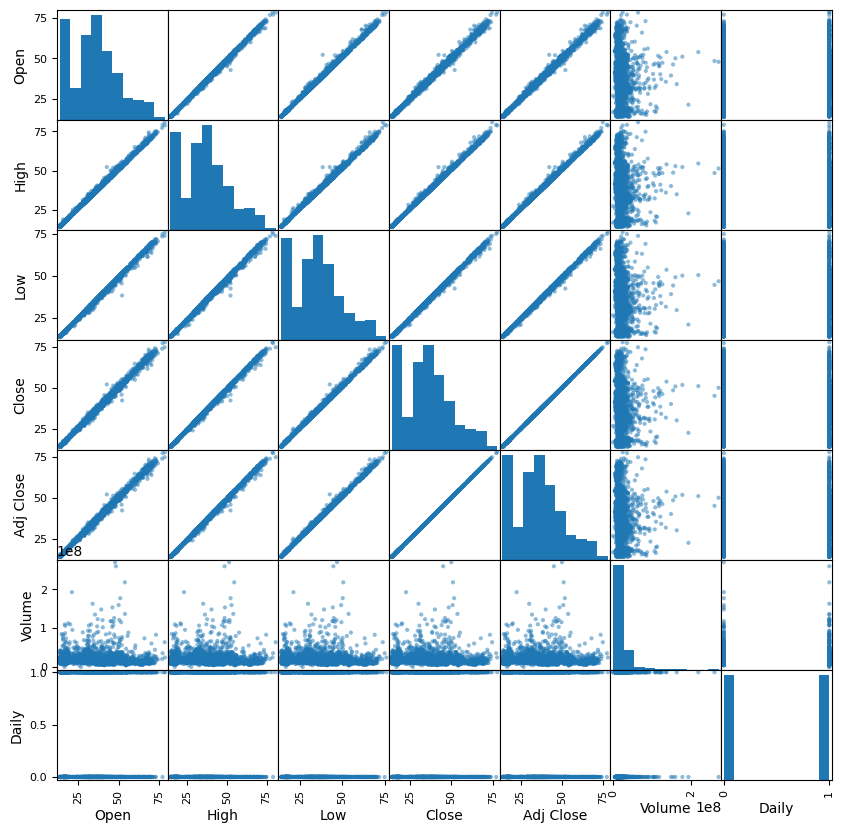

In [5]:
pd.plotting.scatter_matrix(df, figsize =(10,10))
print(df.corr())

In [6]:
# predTrain = df[['Open', 'High', 'Low', 'Close', 'Adj Close']] # gets predictors from the dataframe (cols)
resTrain = df['Daily']
# predTrain = sm.add_constant(predTrain) # adds a column of 1's to an array
# linReg = sm.OLS(resTrain,predTrain).fit() # fits a logistic regression model to the data
# print(linReg.summary())
# resPred = linReg.predict(predTrain) # tests the model
# finPred = list(map(round, resPred)) #makes the values in the appropriate form 
# error = 1 - metrics.accuracy_score(resTrain, finPred) # computes the accuracy score and subtracts from 1 to get the error
# print("First Attempt Linear Regression: ", error) 

# #removes the high column because it doesnt help predict
# predTrain = df[['Open', 'Low', 'Close', 'Adj Close']] # gets predictors from the dataframe (cols)
# predTrain = sm.add_constant(predTrain) # adds a column of 1's to an array
# linReg = sm.OLS(resTrain,predTrain).fit() # fits a logistic regression model to the data
# print(linReg.summary())
# resPred = linReg.predict(predTrain) # tests the model
# finPred = list(map(round, resPred)) #makes the values in the appropriate form 
# error = 1 - metrics.accuracy_score(resTrain, finPred) # computes the accuracy score and subtracts from 1 to get the error
# print("Follow-up Attempt at Linear Regression ", error) 

df['op_h'] = df['Open'] * df['High']
df['op_l'] = df['Open'] * df['Low']
df['op_c'] = df['Open'] * df['Close']
df['op_ac'] = df['Open'] * df['Adj Close']
df['cl_h'] = df['Close'] * df['High']
df['cl_l'] = df['Close'] * df['Low']
df['cl_ac'] = df['Close'] * df['Adj Close']
df['hi_l'] = df['High'] * df['Low']
df['hi_ac'] = df['High'] * df['Adj Close']
df['l_ac'] = df['Adj Close'] * df['Low']
df['op_sq'] = df['Open'] * df['Open']
df['cl_sq'] = df['Close'] * df['Close']
df['hi_sq'] = df['High'] * df['High']
df['l_sq'] = df['Low'] * df['Low']
df['ac_sq'] = df['Adj Close'] * df['Adj Close']
df['op_cu'] = df['Open'] * df['Open'] * df['Open'] 
df['cl_cu'] = df['Close'] * df['Close'] * df['Close']
df['hi_cu'] = df['High'] * df['High'] * df['High']
df['l_cu'] = df['Low'] * df['Low'] * df['Low']
df['ac_cu'] = df['Adj Close'] * df['Adj Close'] * df['Adj Close']
predTrain = df[['Open', 'Close', 'Adj Close', 'op_h',
                'cl_h', 'cl_l', 'hi_ac', 'l_ac', 'op_sq', 'l_sq',]] # gets predictors from the dataframe (cols)
predTrain = sm.add_constant(predTrain) # adds a column of 1's to an array
linReg = sm.OLS(resTrain,predTrain).fit() # fits a logistic regression model to the data
print(linReg.summary())
resPred = linReg.predict(predTrain) # tests the model
finPred = list(map(round, resPred)) #makes the values in the appropriate form 
error = 1 - metrics.accuracy_score(resTrain, finPred) # computes the accuracy score and subtracts from 1 to get the error
print("Variable Interaction Attempt Linear Regression: ", error) 



                            OLS Regression Results                            
Dep. Variable:                  Daily   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     441.5
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:42:17   Log-Likelihood:                -663.47
No. Observations:                2259   AIC:                             1343.
Df Residuals:                    2251   BIC:                             1389.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5398      0.042     12.867      0.0

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

length_data = len(df)
split_ratio = 0.7
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

train_data = df[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

validation_data = df[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

# dataset_train = train_data.Open.values
# dataset_train.shape

# dataset_train = np.reshape(dataset_train, (-1,1))
# dataset_train.shape

Data length : 2259
Train data length : 1581
Validation data lenth : 678


,Date,Open
1581,2020-02-21,38.669998
1582,2020-02-24,36.500000
1583,2020-02-25,36.180000
1584,2020-02-26,35.279999
1585,2020-02-27,33.730000
...,...,...
2254,2022-10-21,50.000000
2255,2022-10-24,50.709999
2256,2022-10-25,52.415001
2257,2022-10-26,52.950001


In [13]:
dataset_train = train_data.Open.values
dataset_train.shape

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1581, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1581, 1)

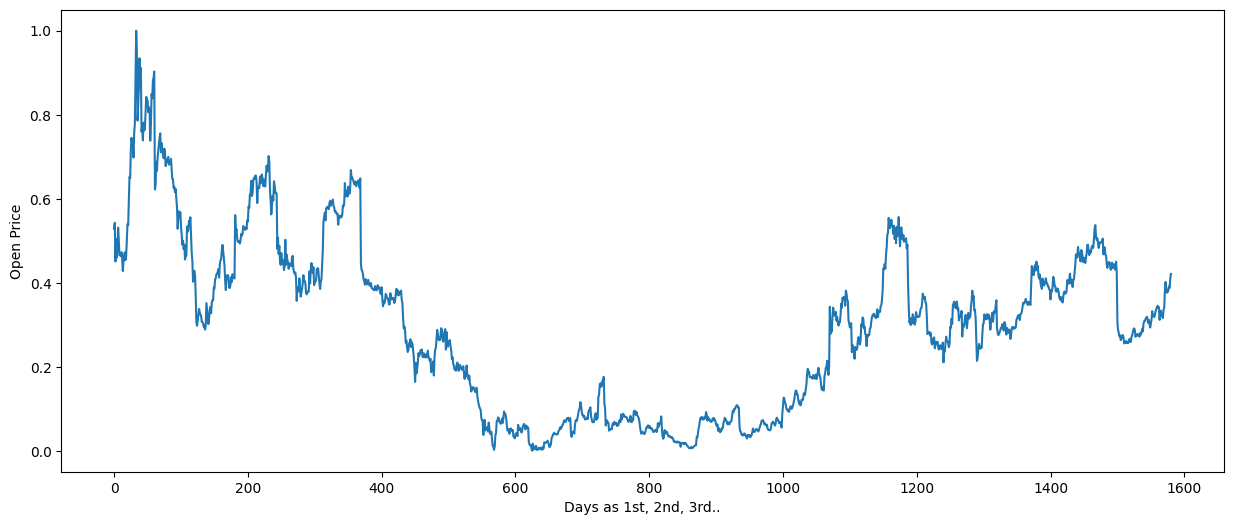

In [16]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [18]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1531, 50)
Shape of y_train before reshape : (1531,)


In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1531, 50, 1)
Shape of y_train after reshape : (1531, 1)


In [23]:
X_train[0]


array([[0.52859324],
       [0.54267778],
       [0.45053456],
       [0.5041575 ],
       [0.45952826],
       [0.48175804],
       [0.53113867],
       [0.50144241],
       [0.4656372 ],
       [0.46580695],
       [0.46326152],
       [0.47276434],
       [0.46037678],
       [0.42779571],
       [0.45002549],
       [0.46580695],
       [0.47242495],
       [0.4537587 ],
       [0.46360091],
       [0.50059397],
       [0.53962331],
       [0.53690822],
       [0.5930766 ],
       [0.6524691 ],
       [0.64907522],
       [0.71695237],
       [0.74512139],
       [0.73001872],
       [0.73052778],
       [0.69794679],
       [0.75615137],
       [0.77889021],
       [0.88902085],
       [1.        ],
       [0.9528254 ],
       [0.78601735],
       [0.82148317],
       [0.86628207],
       [0.93415922],
       [0.86339733],
       [0.91159003],
       [0.75954524],
       [0.77362979],
       [0.73901243],
       [0.78109626],
       [0.76243006],
       [0.76633299],
       [0.806

In [24]:
y_train[0]

array([0.83421014])

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import os


# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


2022-12-14 21:02:46.019407: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


48/48 [==============================] - 3s 19ms/step - loss: 0.2808 - accuracy: 6.5317e-04
Epoch 2/50
48/48 [==============================] - 1s 19ms/step - loss: 0.1649 - accuracy: 6.5317e-04
Epoch 3/50
48/48 [==============================] - 1s 21ms/step - loss: 0.1080 - accuracy: 6.5317e-04
Epoch 4/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0782 - accuracy: 6.5317e-04
Epoch 5/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0599 - accuracy: 6.5317e-04
Epoch 6/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0455 - accuracy: 6.5317e-04
Epoch 7/50
48/48 [==============================] - 1s 23ms/step - loss: 0.0342 - accuracy: 6.5317e-04
Epoch 8/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0268 - accuracy: 6.5317e-04
Epoch 9/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0243 - accuracy: 6.5317e-04
Epoch 10/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0205 - a

In [31]:
history.history["loss"]

[0.280758798122406,
 0.1649279147386551,
 0.1079588234424591,
 0.07822418212890625,
 0.05987176671624184,
 0.045483510941267014,
 0.03416905179619789,
 0.026835044845938683,
 0.02428891696035862,
 0.020505940541625023,
 0.01843475177884102,
 0.01557943131774664,
 0.013090040534734726,
 0.012113168835639954,
 0.01072919461876154,
 0.00844279583543539,
 0.008520012721419334,
 0.007815406657755375,
 0.006815371569246054,
 0.006614048499614,
 0.006355572026222944,
 0.005911908112466335,
 0.005695759318768978,
 0.005502385087311268,
 0.0049105980433523655,
 0.0043093543499708176,
 0.004614807199686766,
 0.003920219838619232,
 0.0036712607834488153,
 0.003798132296651602,
 0.0035557597875595093,
 0.0036035303492099047,
 0.0033691655844449997,
 0.0031486679799854755,
 0.0029842532239854336,
 0.002780904993414879,
 0.00282474746927619,
 0.0027809629682451487,
 0.0026132529601454735,
 0.002389440545812249,
 0.0029595906380563974,
 0.0022550702560693026,
 0.002469911938533187,
 0.002176127862185

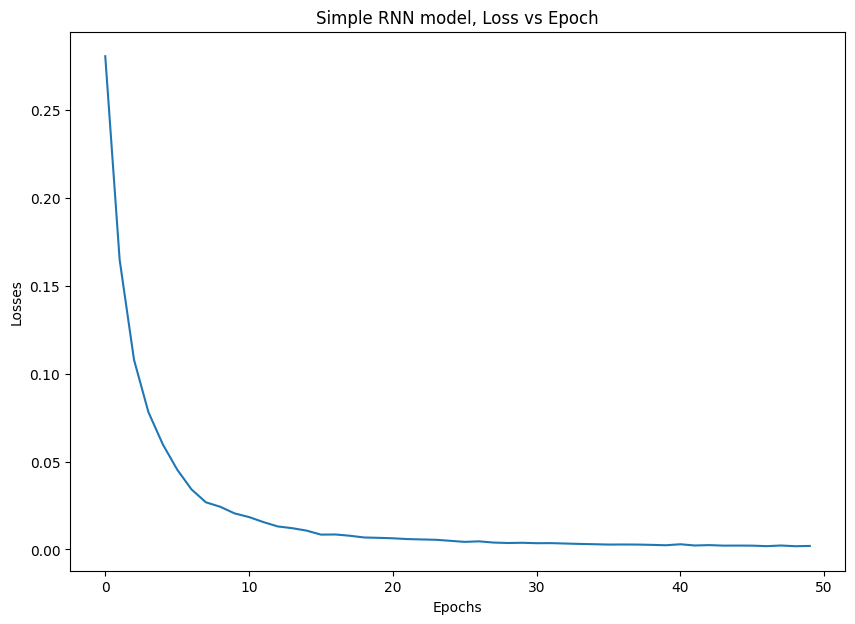

In [32]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

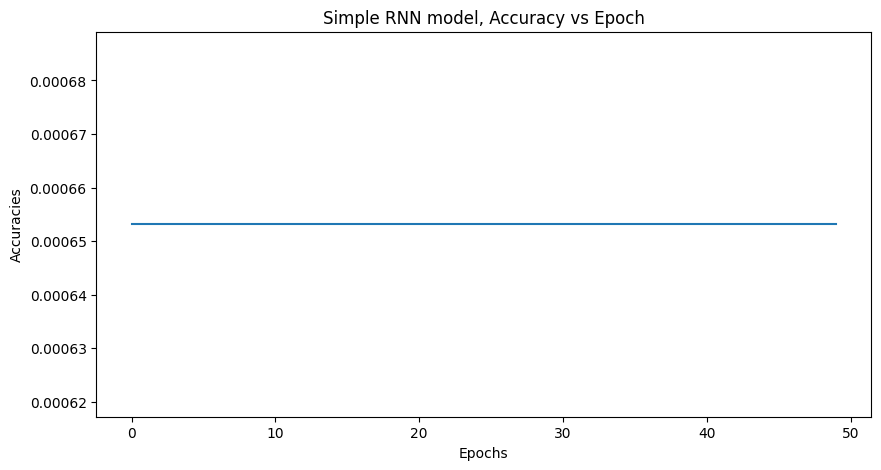

In [33]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [34]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

48/48 [==============================] - 1s 6ms/step


(1531, 1)

In [35]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1531, 1)

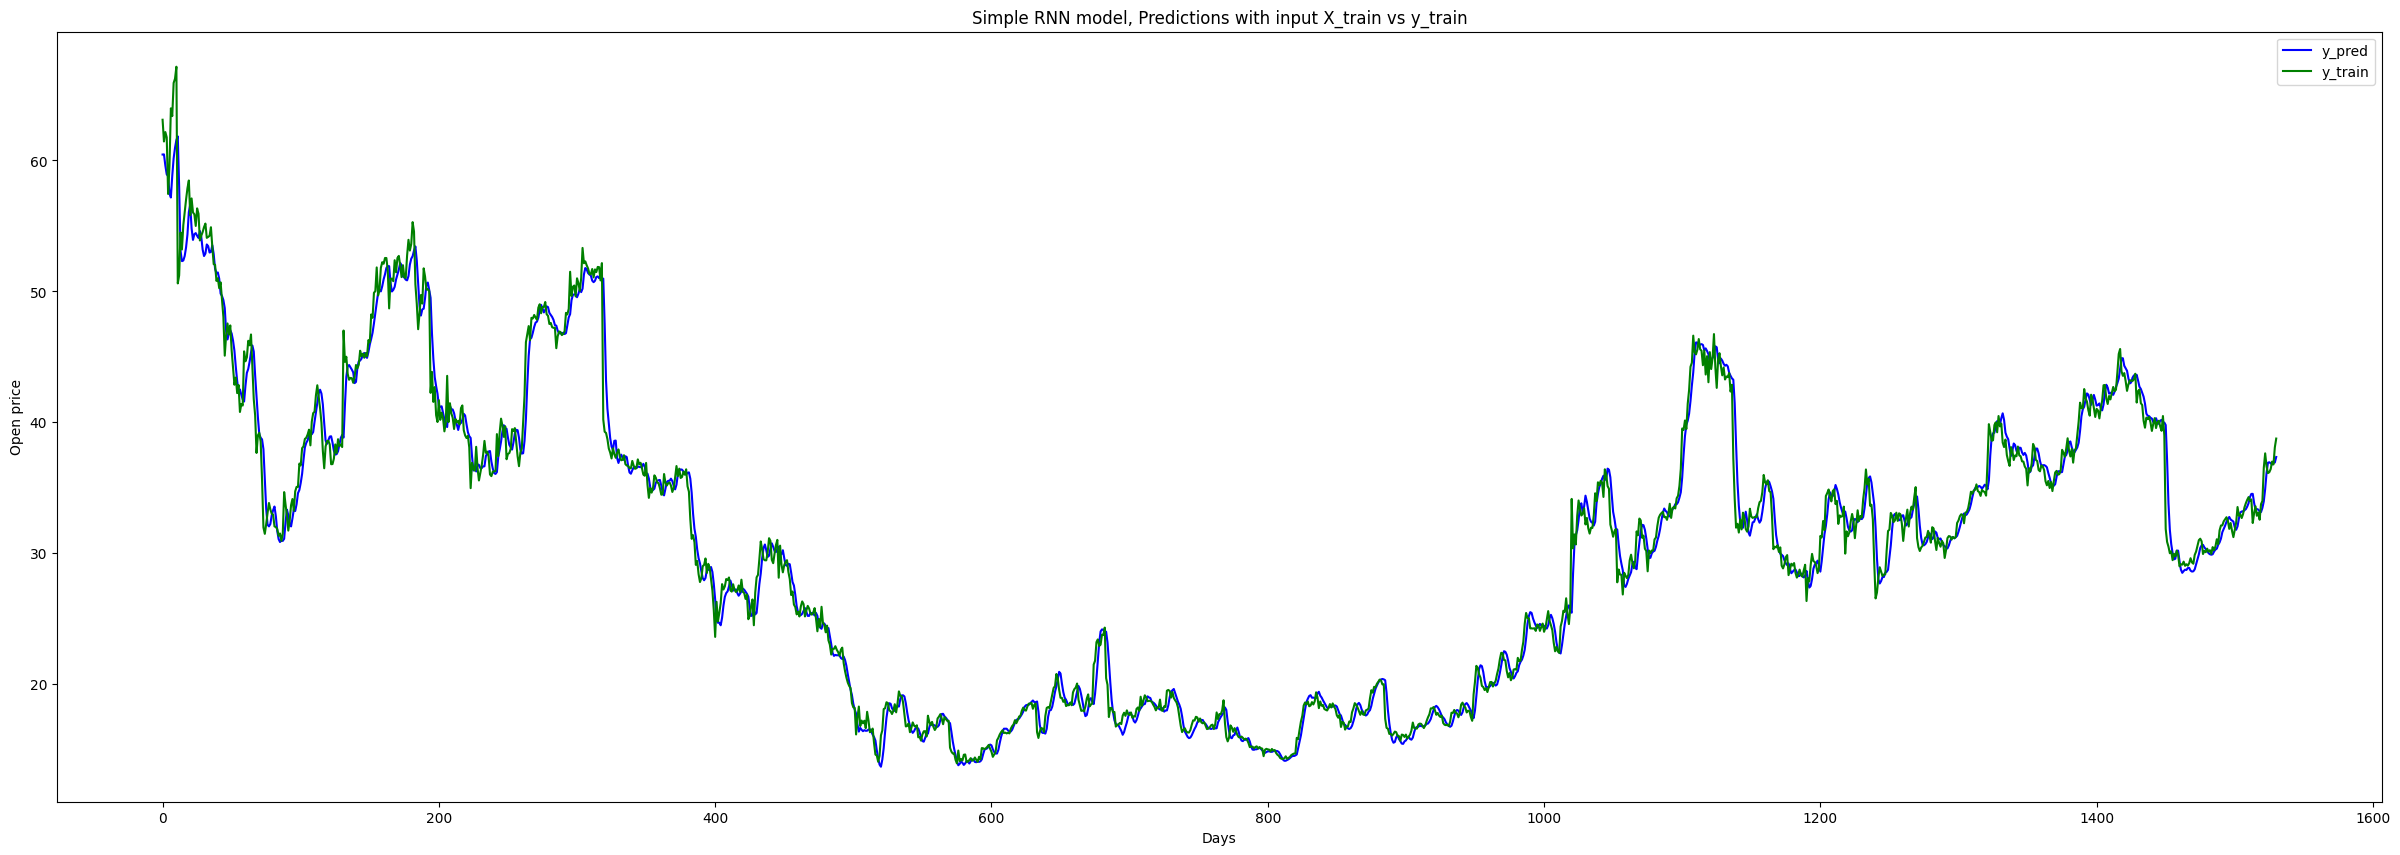

In [36]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [37]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (678, 1)


In [38]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [39]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [40]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (628, 50)
Shape of y_test before reshape : (628,)


In [41]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (628, 50, 1)
Shape of y_test after reshape : (628, 1)


In [42]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

20/20 [==============================] - 0s 7ms/step
Shape of y_pred_of_test : (628, 1)


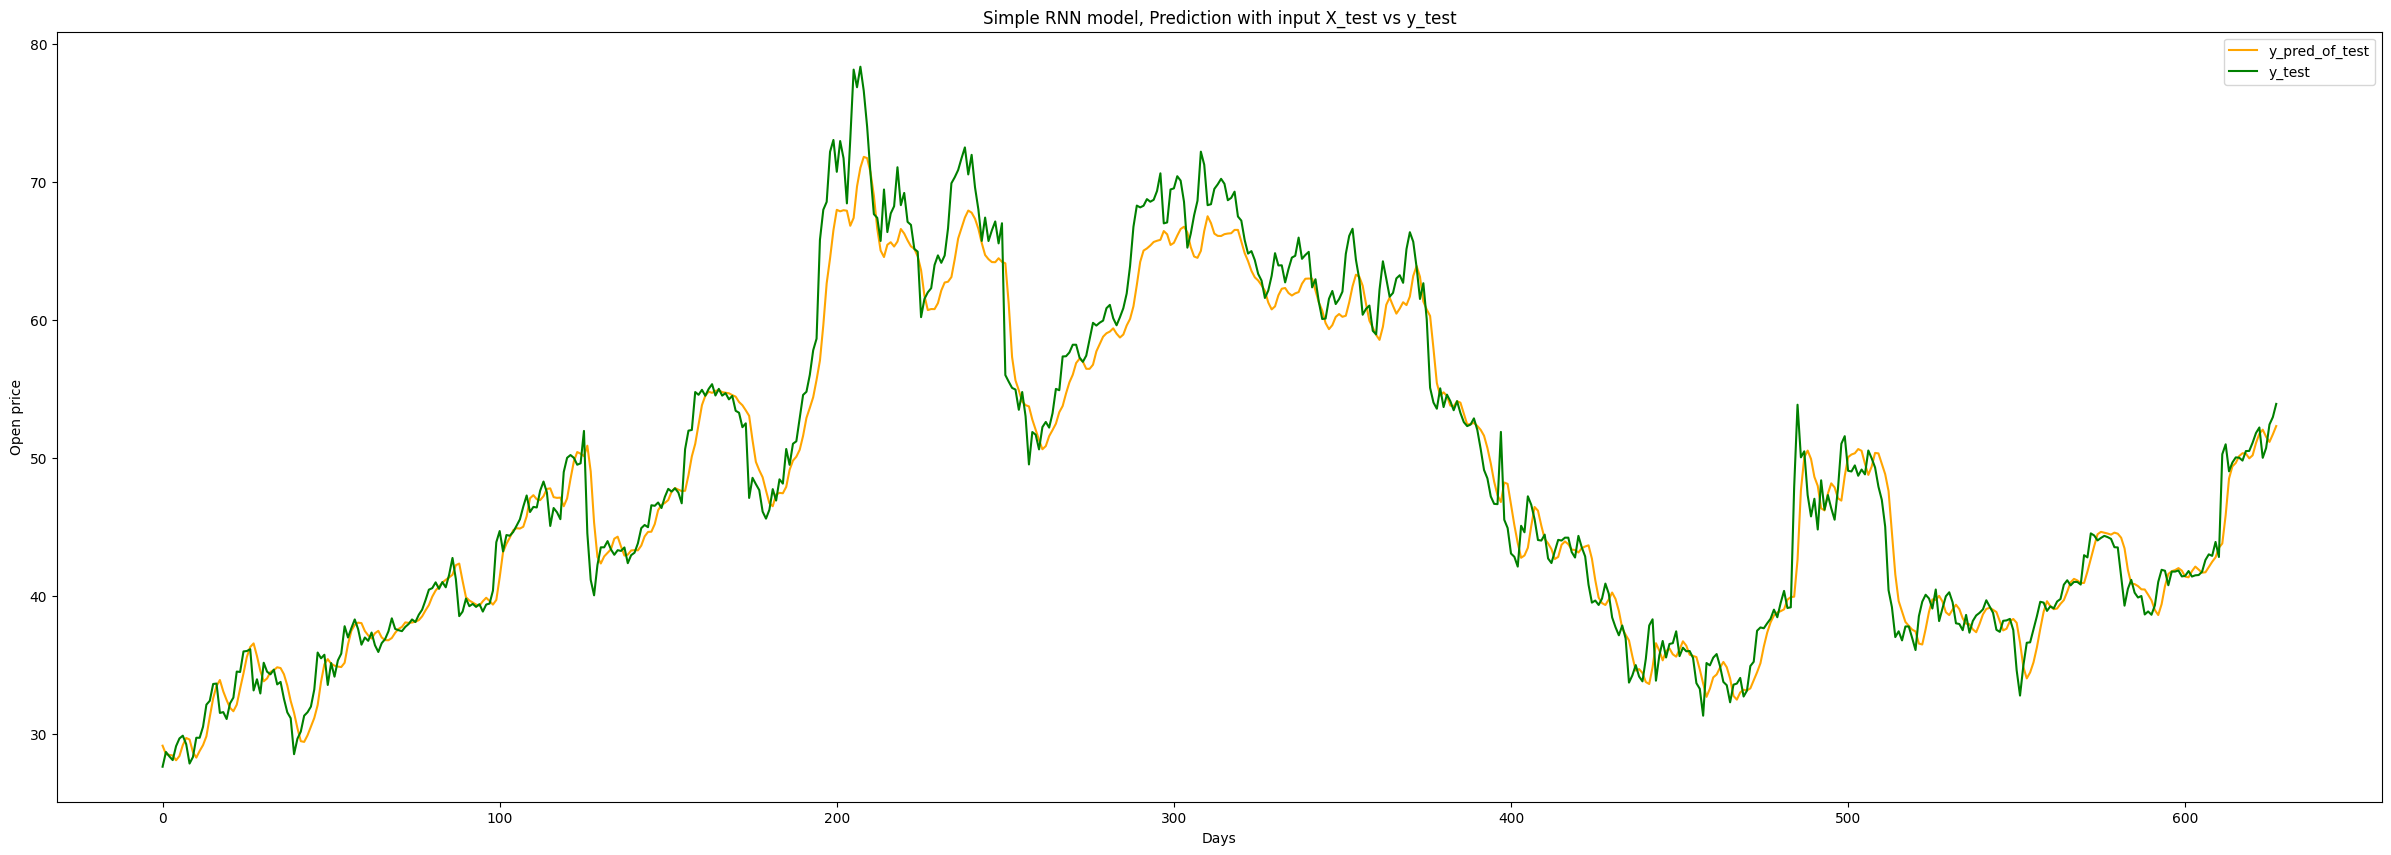

In [43]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

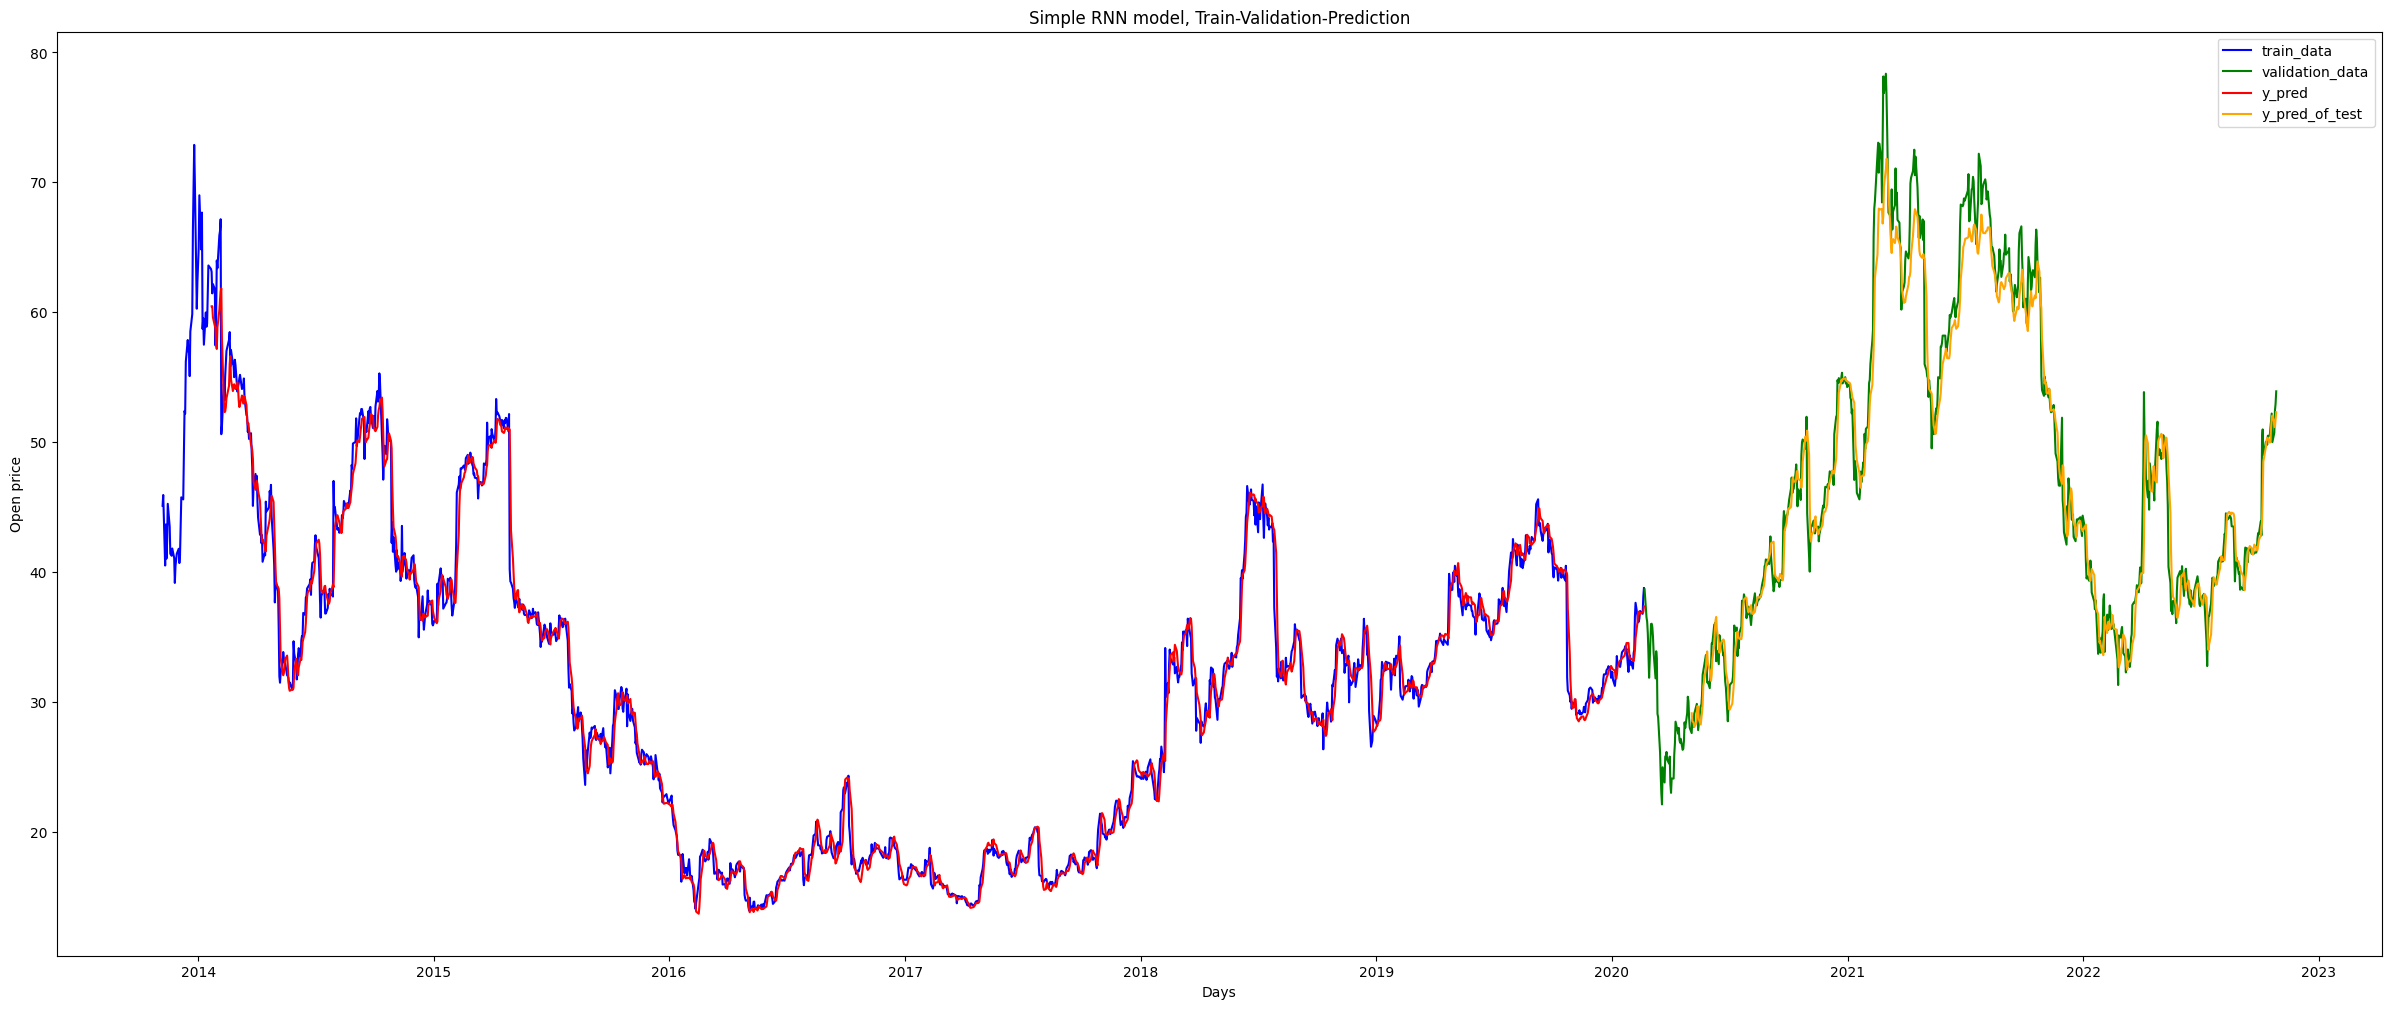

In [44]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [45]:
y_train = scaler.fit_transform(y_train)

from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
154/154 [==============================] - 6s 20ms/step - loss: 0.0050 - accuracy: 0.0013
Epoch 2/10
154/154 [==============================] - 3s 20ms/step - loss: 0.0017 - accuracy: 0.0013
Epoch 3/10
154/154 [==============================] - 4s 23ms/step - loss: 0.0014 - accuracy: 0.0013
Epoch 4/10
154/154 [==============================] - 4s 27ms/step - loss: 0.0012 - accuracy: 0.0013
Epoch 5/10
154/154 [==============================] - 4s 24ms/step - loss: 0.0012 - accuracy: 0.0013
Epoch 6/10
154/154 [==============================] - 5s 30ms/step - loss: 0.0011 - accuracy: 0.0013
Epoch 7/10
154/154 [==============================] - 4s 28ms/step - loss: 9.2929e-04 - accuracy: 0.0013
Epoch 8/10
154/154 [==============================] - 4s 27ms/step - loss: 8.2930e-04 - accuracy: 0.0013
Epoch 9/10
154/154 [==============================] - 5s 33ms/step - loss: 7.9004e-04 - accuracy: 0.0013
Epoch 10/10
154/154 [==============================] - 5s 30ms/step - loss: 6.5

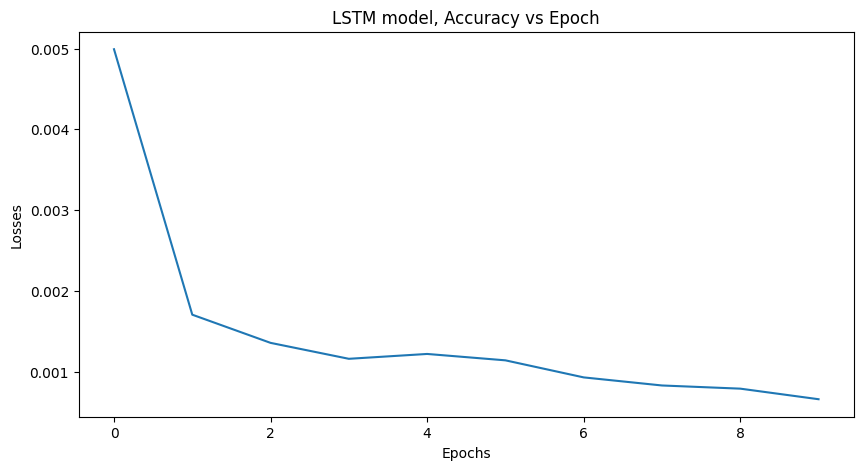

In [46]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

20/20 [==============================] - 1s 10ms/step


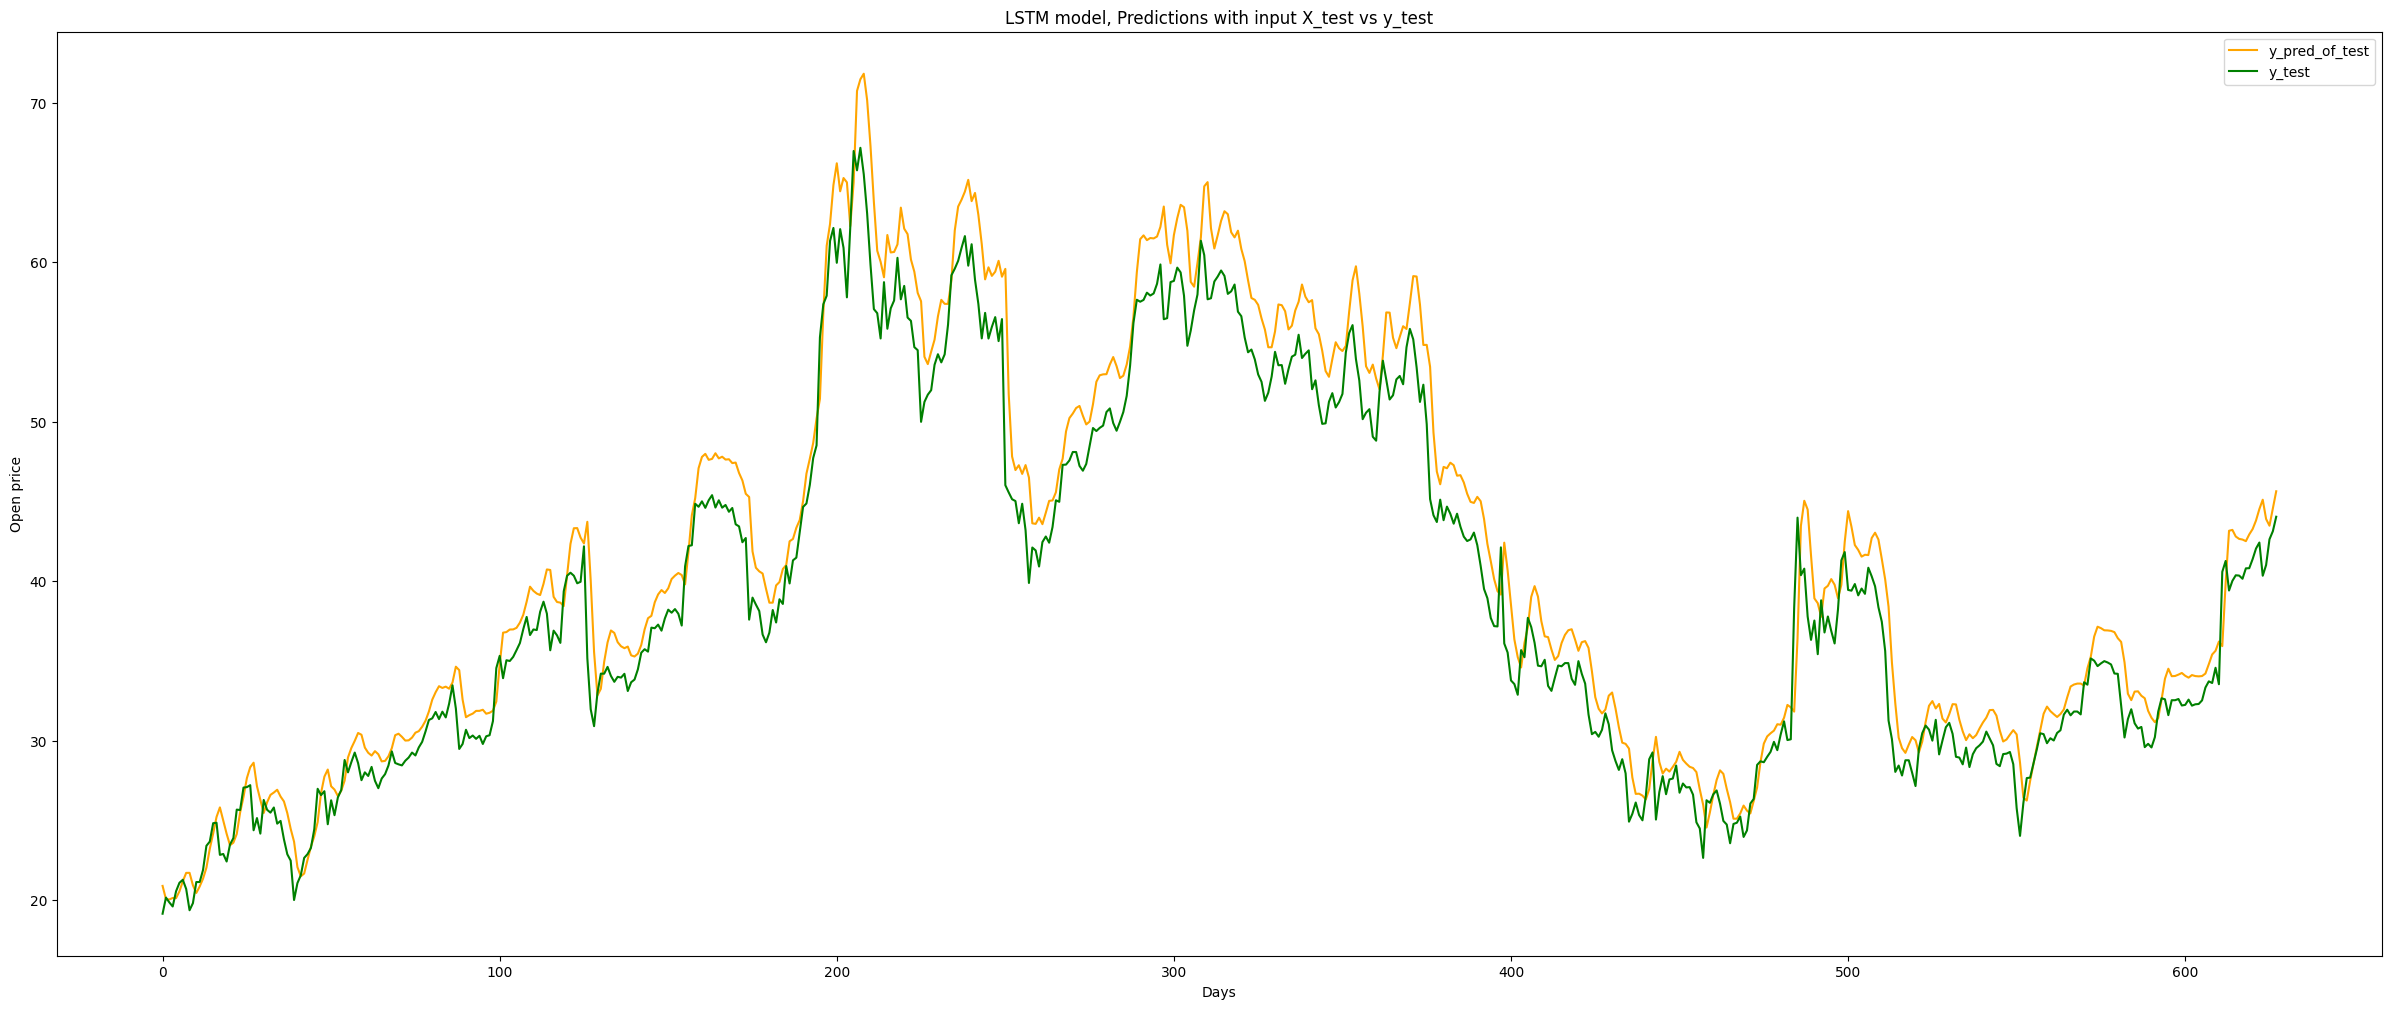

In [47]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [48]:
df.iloc[-1]

Date              10/27/22
Open                 53.91
High                  54.0
Low              53.700001
Close            53.700001
Adj Close        53.700001
Volume           136345128
Daily                    1
op_h               2911.14
op_l           2894.967054
op_c           2894.967054
op_ac          2894.967054
cl_h           2899.800054
cl_l           2883.690107
cl_ac          2883.690107
hi_l           2899.800054
hi_ac          2899.800054
l_ac           2883.690107
op_sq            2906.2881
cl_sq          2883.690107
hi_sq               2916.0
l_sq           2883.690107
ac_sq          2883.690107
op_cu        156677.991471
cl_cu        154854.161651
hi_cu             157464.0
l_cu         154854.161651
ac_cu        154854.161651
Name: 2258, dtype: object

In [49]:
X_input = df.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.35971221],
        [0.32047094],
        [0.3191629 ],
        [0.17920221],
        [0.04316546],
        [0.12295624],
        [0.16546781],
        [0.10464368],
        [0.08175277],
        [0.08894708],
        [0.00130804],
        [0.01569666],
        [0.        ],
        [0.04447351],
        [0.15565735],
        [0.21321137],
        [0.20863321],
        [0.13996068],
        [0.20470901],
        [0.20470901],
        [0.20994132],
        [0.18181837],
        [0.18443426],
        [0.20732517],
        [0.18116415],
        [0.18705041],
        [0.18835846],
        [0.20405512],
        [0.25964688],
        [0.28646179],
        [0.27926748],
        [0.34532391],
        [0.27403543],
        [0.76128177],
        [0.8083715 ],
        [0.68018315],
        [0.72204057],
        [0.74623932],
        [0.74493121],
        [0.73119681],
        [0.77632454],
        [0.77697843],
        [0.81621963],
        [0.86200125],
        [0.88816227],
        [0

In [50]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 24ms/step
Simple RNN, Open price prediction for 3/18/2017      : 51.621845
LSTM prediction, Open price prediction for 3/18/2017 : 55.31849
